# Chapter 3 
# Starting with Machine Learning - MNIST

# Contents #
***
- [ ] Linear regression
- [x] The MNIST dataset
- [ ] Classifiers
- [ ] The nearest neighbor algorithm
- [ ] Data clustering
- [ ] The k-means algorithm

## The MNIST dataset 
***
* Available at http://yann.lecun.com/exdb/mnist/ .
* Black and white images of handwritten digits from 0 to 9.
* Two groups: 60,000 to train the model and an additional 10,000 to test it. 
* Size 28×28 pixels and centered by calculating the center of mass of the pixels.

<center><img src="imgs\MNIST_digit_sampling.png" width="45%" height="45%"></center>
<center>MNIST digit sampling</center>

Each MNIST data point is an array of numbers describing how dark each pixel is. 
<center><img src="imgs\Pixel_representation_of_the_digit_1.png" width="90%" height="90%"></center>


Downloading and preparing the data The following code imports the MNIST data files that we are going to classify. I am using a script from Google that can be downloaded from:
<HR>
    
[https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py](https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py)

<HR>
__This must be run in the same folder where the files are located.__

In [31]:
# Now we will show how to load and display the data:
import input_data
import numpy as np
import matplotlib.pyplot as plt 

# Using input_data, we load the data sets:
# wrong: mnist_images = input_data.read_data_sets("MNIST_data/",one_hot="False")
mnist_images = input_data.read_data_sets("MNIST_data",one_hot=False)

# train.next_batch(10) returns the first 10 images :    
pixels,real_values = mnist_images.train.next_batch(10) 

# This also returns two lists: the matrix of the pixels loaded and the list that contains the real values loaded:

# Wrong: print "list of values loaded ",real_values
print ("list of values loaded %d",real_values)

example_to_visualize = 5    
# Wrong: print "element N° " + str(example_to_visualize + 1) + " of the list plotted"
print ("element N " + str(example_to_visualize + 1) + " of the list plotted")


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
list of values loaded %d [7 3 4 6 1 8 1 0 9 8]
element N 6 of the list plotted


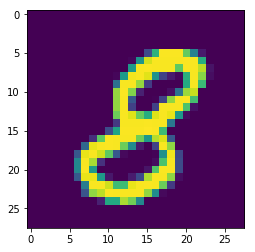

In [17]:
# While displaying an element, we can use matplotlib, as follows:
image = pixels[example_to_visualize,:]
image = np.reshape(image,[28,28])
plt.imshow(image)
plt.show()

In [23]:
mnist_images = input_data.read_data_sets("MNIST_data",one_hot=True)
print(mnist_images.train.images.shape)
print(mnist_images.train.labels.shape)
print(mnist_images.test.images.shape)
print(mnist_images.test.labels.shape)
print(mnist_images.validation.images.shape)
print(mnist_images.validation.labels.shape)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)
(5000, 784)
(5000, 10)


In [24]:
mnist_images.train.images[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
mnist_images.train.images[5].shape

(784,)

In [29]:
mnist_images.train.labels[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])